<a href="https://colab.research.google.com/github/phuocthok18/NhanDangTienVN/blob/main/CNN_NhanDangTienVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


link image : https://drive.google.com/drive/folders/18p-H2Q7W4T_HY1D2SxVaZ4T7HZRoxFou?usp=sharing

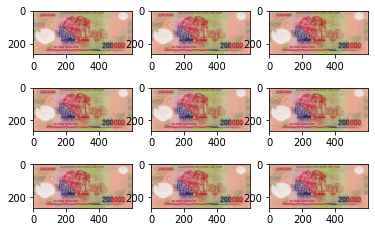

In [10]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/NhanDangTienVN/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'HaiTram_sau'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [18]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/NhanDangTienVN/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('HaiTram_sau'):
    output = 0
    photo = load_img(folder+file,target_size=(300,600))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('HaiTram_truoc'):
    output = 1
    photo = load_img(folder+file,target_size=(300,600))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('MotTram_sau'):
    output = 2
    photo = load_img(folder+file,target_size=(300,600))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('MotTram_truoc'):
    output = 3
    photo = load_img(folder+file,target_size=(300,600))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('NamTram_sau'):
    output = 4
    photo = load_img(folder+file,target_size=(300,600))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)   

for file in listdir(folder):
  if file.startswith('NamTram_truoc'):
    output = 5
    photo = load_img(folder+file,target_size=(300,600))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)   

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('NhanDangTienVN_photos.npy', photos)
save('NhanDangTienVN_labels.npy', labels)

(60, 300, 600, 3) (60,)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(300, 600, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(photos, labels, epochs=50, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 598, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 299, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 297, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 148, 64)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 691456)            0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [20]:
model.save('NhanDangTienVN.h5')

In [21]:
from keras.models import load_model
models=load_model('NhanDangTienVN.h5')

Giá trị: 0
200K


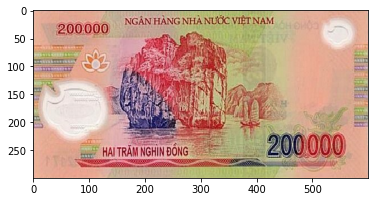

In [23]:
from keras.saving.model_config import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/NhanDangTienVN/HaiTram_sau1.jpg', target_size=(300,600))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,600,3) 
img = img.astype('float32')
img = img/255
np.argmax(models.predict(img), axis=1)
print('Giá trị:', np.argmax(models.predict(img)))
if ((np.argmax(models.predict(img)) == 0) or(np.argmax(models.predict(img)) == 1)):
   print("200K")
if ((np.argmax(models.predict(img)) == 2) or(np.argmax(models.predict(img)) == 3)):
   print("100k")
if ((np.argmax(models.predict(img)) == 4) or(np.argmax(models.predict(img)) == 5)):
   print("500k")

Giá trị: 1
200K


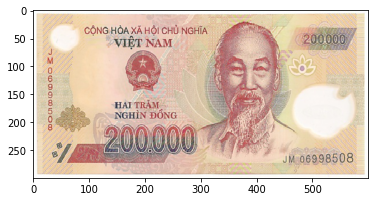

In [24]:
from keras.saving.model_config import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/NhanDangTienVN/HaiTram_truoc1.jpg', target_size=(300,600))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,600,3) 
img = img.astype('float32')
img = img/255
np.argmax(models.predict(img), axis=1)
print('Giá trị:', np.argmax(models.predict(img)))
if ((np.argmax(models.predict(img)) == 0) or(np.argmax(models.predict(img)) == 1)):
   print("200K")
if ((np.argmax(models.predict(img)) == 2) or(np.argmax(models.predict(img)) == 3)):
   print("100k")
if ((np.argmax(models.predict(img)) == 4) or(np.argmax(models.predict(img)) == 5)):
   print("500k")

Giá trị: 2
100k


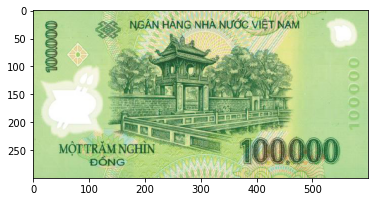

In [25]:
from keras.saving.model_config import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/NhanDangTienVN/MotTram_sau1.jpg', target_size=(300,600))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,600,3) 
img = img.astype('float32')
img = img/255
np.argmax(models.predict(img), axis=1)
print('Giá trị:', np.argmax(models.predict(img)))
if ((np.argmax(models.predict(img)) == 0) or(np.argmax(models.predict(img)) == 1)):
   print("200K")
if ((np.argmax(models.predict(img)) == 2) or(np.argmax(models.predict(img)) == 3)):
   print("100k")
if ((np.argmax(models.predict(img)) == 4) or(np.argmax(models.predict(img)) == 5)):
   print("500k")

Giá trị: 3
100k


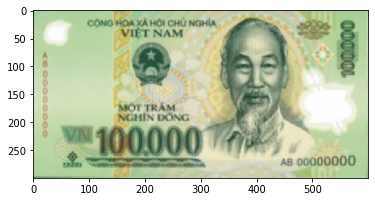

In [27]:
from keras.saving.model_config import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/NhanDangTienVN/MotTram_truoc1.jpg', target_size=(300,600))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,600,3) 
img = img.astype('float32')
img = img/255
np.argmax(models.predict(img), axis=1)
print('Giá trị:', np.argmax(models.predict(img)))
if ((np.argmax(models.predict(img)) == 0) or(np.argmax(models.predict(img)) == 1)):
   print("200K")
if ((np.argmax(models.predict(img)) == 2) or(np.argmax(models.predict(img)) == 3)):
   print("100k")
if ((np.argmax(models.predict(img)) == 4) or(np.argmax(models.predict(img)) == 5)):
   print("500k")

Giá trị: 4
500k


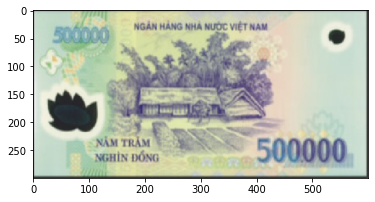

In [28]:
from keras.saving.model_config import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/NhanDangTienVN/NamTram_sau1.jpg', target_size=(300,600))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,600,3) 
img = img.astype('float32')
img = img/255
np.argmax(models.predict(img), axis=1)
print('Giá trị:', np.argmax(models.predict(img)))
if ((np.argmax(models.predict(img)) == 0) or(np.argmax(models.predict(img)) == 1)):
   print("200K")
if ((np.argmax(models.predict(img)) == 2) or(np.argmax(models.predict(img)) == 3)):
   print("100k")
if ((np.argmax(models.predict(img)) == 4) or(np.argmax(models.predict(img)) == 5)):
   print("500k")

Giá trị: 5
500k


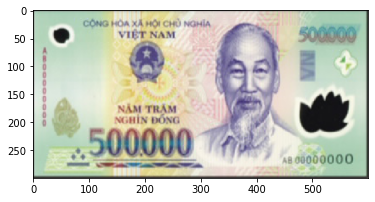

In [29]:
from keras.saving.model_config import model_from_json
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
img = load_img('/content/drive/MyDrive/NhanDangTienVN/NamTram_truoc1.jpg', target_size=(300,600))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,300,600,3) 
img = img.astype('float32')
img = img/255
np.argmax(models.predict(img), axis=1)
print('Giá trị:', np.argmax(models.predict(img)))
if ((np.argmax(models.predict(img)) == 0) or(np.argmax(models.predict(img)) == 1)):
   print("200K")
if ((np.argmax(models.predict(img)) == 2) or(np.argmax(models.predict(img)) == 3)):
   print("100k")
if ((np.argmax(models.predict(img)) == 4) or(np.argmax(models.predict(img)) == 5)):
   print("500k")